## Multi model graphs

# Crimes and Samples graph

#### This code reads a csv file, defines independent and dependent variables, runs 300 iterations of Machine Learning models with different train-test splits and displays a histogram and mean of the Mean Squared Error results  

In [91]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import json
import os


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
		accuracy_score as acc_score,
		recall_score   as recall,
		confusion_matrix,
        mean_squared_error, 
        r2_score
		)
from sklearn.decomposition import PCA


#MODELS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#import xgboost as xgb
#xgb_regressor = xgb.XGBRegressor()
from sklearn.neural_network import MLPRegressor  # Use MLPRegressor for regression
#from minepy import MINE

In [92]:
#Path
#Insert your local repo path to file
path_home = "D:\Archivos\Social Data Challenge\data\grids\quarter_samples"

csv_100 = pd.read_csv(path_home + '\grid_100_htmp.csv')
csv_500 = pd.read_csv(path_home + '\grid_500_htmp.csv')

In [93]:
csv_100.head()

,id,lat,lon,metro_100,cams_100,zonas_pat,antro_100,salud_100,museo_100,esc_100,...,crime22q1,sample22q1,crime22q2,sample22q2,crime22q3,sample22q3,crime22q4,sample22q4,crime23q1,sample23q1
0,1,19.465514,-99.184187,0,0,1,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,2,19.464666,-99.184187,0,0,1,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,3,19.463818,-99.184187,0,0,1,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,4,19.462970,-99.184187,0,0,1,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,5,19.462123,-99.184187,0,0,1,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [94]:

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#x_1=pd.DataFrame(X_scaled, columns = X.columns)

#X_scaled[X_scaled.sample22q2 != 0]
#x[x.crime22q4 >0]

In [98]:
df = csv_100.copy()

scaled= False
mic = False
pca_flag = False
pca_components = 1

X =  df.iloc[:, 3:-2]

In [99]:
if scaled :
    scaler = StandardScaler()
    X =  pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

if mic:
    mic_cols= [col for col in X.columns if col.startswith('sample')]
    X= X[mic_cols]

if pca_flag:
    pca = PCA(n_components=pca_components)
    pca.fit(X)
    X=pd.DataFrame(pca.transform(X))

In [100]:
x_scaled =  pd.DataFrame(scaler.fit_transform(X), columns = x.columns)

y_crimes = df['crime23q1']
y_samples = df['sample23q1']



In [101]:
models = {
    #'Linear Regression': LinearRegression(),
    'Random Forest Scaled Crimes': RandomForestRegressor(n_estimators =200,max_depth= 20),
    'Random Forest Scaled Samples': RandomForestRegressor(n_estimators =200,max_depth= 20)#,

    #'SVR': SVR(C=10, kernel='rbf'),#,
    #'SVR (Standard Scaler)': SVR(C=10, kernel='rbf')#,

}

# Create a DataFrame to store the results
results = {'Model': [], 'Average MSE': []}
# Create a dictionary to store MSE values for each model
mse_values_dict = {model_name: [] for model_name in models.keys()}


# Perform iterations for each model
num_iterations = 300



In [102]:
for model_name, model in models.items():
    
    mse_values = []
           
    x = x_scaled  if 'Scaled'  in model_name else X
    y = y_samples if 'Samples' in model_name else y_crimes

    for _ in range(num_iterations):    
         
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate MSE for this iteration
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        
        # Store the MSE values for this model in the dictionary
        mse_values_dict[model_name] = mse_values

    # Calculate the average MSE
    average_mse = np.mean(mse_values)
    
    # Append results to the DataFrame
    results['Model'].append(model_name)
    results['Average MSE'].append(average_mse)
    
# Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [ ]:
results_df

,Model,Average MSE
0,Random Forest Scaled Crimes,0.249818
1,Random Forest Scaled Samples,0.307547


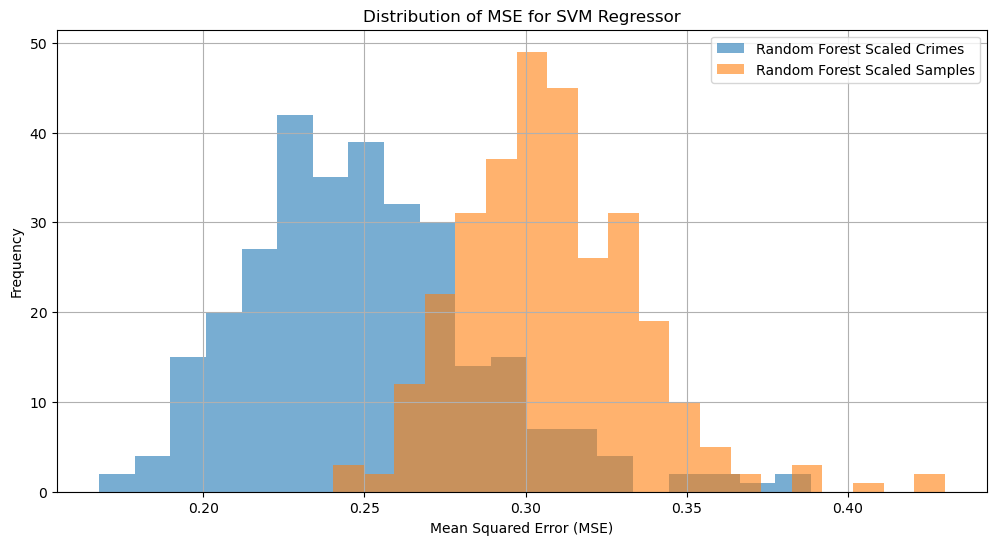

                          Model  Average MSE
0   Random Forest Scaled Crimes     0.249818
1  Random Forest Scaled Samples     0.307547


In [ ]:
# Plot histograms for each model's MSE
plt.figure(figsize=(12, 6))
for model_name in models.keys():
    plt.hist(mse_values_dict[model_name], bins=20, alpha=0.6, label=model_name)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of MSE for SVM Regressor')
plt.legend()
plt.grid(True)

# Show the histogram plot
plt.show()

# Display the results DataFrame
print(results_df)

In [116]:
models = {
    #'Linear Regression': LinearRegression(),
    'Random Forest Crimes': RandomForestRegressor(n_estimators =200,max_depth= 20),
    'Random Forest Scaled Crimes': RandomForestRegressor(n_estimators =200,max_depth= 20)#,

    #'SVR': SVR(C=10, kernel='rbf'),#,
    #'SVR (Standard Scaler)': SVR(C=10, kernel='rbf')#,

}

# Create a DataFrame to store the results
results = {'Model': [], 'Average MSE': []}
# Create a dictionary to store MSE values for each model
mse_values_dict = {model_name: [] for model_name in models.keys()}


# Perform iterations for each model
num_iterations = 300



In [117]:
for model_name, model in models.items():
    
    mse_values = []
           
    x = x_scaled  if 'Scaled'  in model_name else X
    y = y_samples if 'Samples' in model_name else y_crimes

    for _ in range(num_iterations):    
         
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate MSE for this iteration
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        
        # Store the MSE values for this model in the dictionary
        mse_values_dict[model_name] = mse_values

    # Calculate the average MSE
    average_mse = np.mean(mse_values)
    
    # Append results to the DataFrame
    results['Model'].append(model_name)
    results['Average MSE'].append(average_mse)
    
# Create a DataFrame from the results
results_df = pd.DataFrame(results)


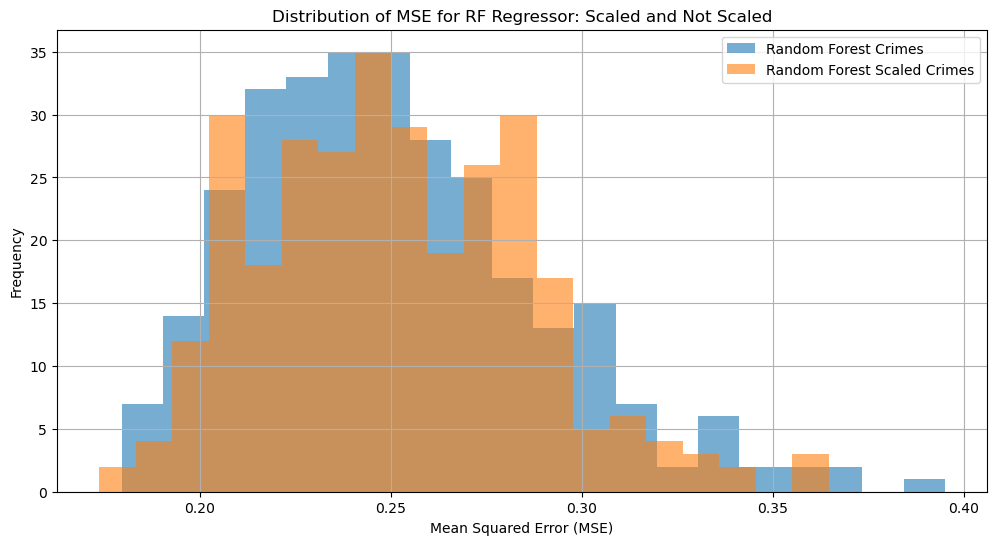

                         Model  Average MSE
0         Random Forest Crimes     0.250377
1  Random Forest Scaled Crimes     0.250910


In [ ]:
# Plot histograms for each model's MSE
plt.figure(figsize=(12, 6))
for model_name in models.keys():
    plt.hist(mse_values_dict[model_name], bins=20, alpha=0.6, label=model_name)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of MSE for RF Regressor: Scaled and Not Scaled')
plt.legend()
plt.grid(True)

# Show the histogram plot
plt.show()

# Display the results DataFrame
print(results_df)

In [ ]:
results_df

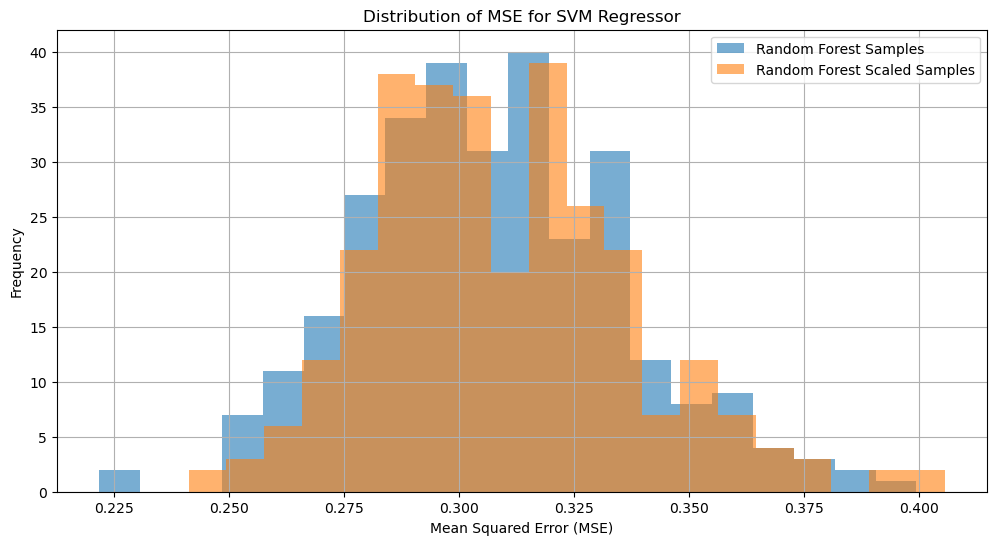

                          Model  Average MSE
0         Random Forest Samples     0.307027
1  Random Forest Scaled Samples     0.309342


In [114]:
# Plot histograms for each model's MSE
plt.figure(figsize=(12, 6))
for model_name in models.keys():
    plt.hist(mse_values_dict[model_name], bins=20, alpha=0.6, label=model_name)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of MSE for SVM Regressor')
plt.legend()
plt.grid(True)

# Show the histogram plot
plt.show()

# Display the results DataFrame
print(results_df)

In [ ]:
models = {
    #'Linear Regression': LinearRegression(),
    'Random Forest Samples': RandomForestRegressor(n_estimators =200,max_depth= 20),
    'Random Forest Scaled Samples': RandomForestRegressor(n_estimators =200,max_depth= 20)#,

    #'SVR': SVR(C=10, kernel='rbf'),#,
    #'SVR (Standard Scaler)': SVR(C=10, kernel='rbf')#,

}

# Create a DataFrame to store the results
results = {'Model': [], 'Average MSE': []}
# Create a dictionary to store MSE values for each model
mse_values_dict = {model_name: [] for model_name in models.keys()}


# Perform iterations for each model
num_iterations = 300



In [ ]:
for model_name, model in models.items():
    
    mse_values = []
           
    x = x_scaled  if 'Scaled'  in model_name else X
    y = y_samples if 'Samples' in model_name else y_crimes

    for _ in range(num_iterations):    
         
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate MSE for this iteration
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        
        # Store the MSE values for this model in the dictionary
        mse_values_dict[model_name] = mse_values

    # Calculate the average MSE
    average_mse = np.mean(mse_values)
    
    # Append results to the DataFrame
    results['Model'].append(model_name)
    results['Average MSE'].append(average_mse)
    
# Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [ ]:
results_df

,Model,Average MSE
0,Random Forest Samples,0.307027
1,Random Forest Scaled Samples,0.309342


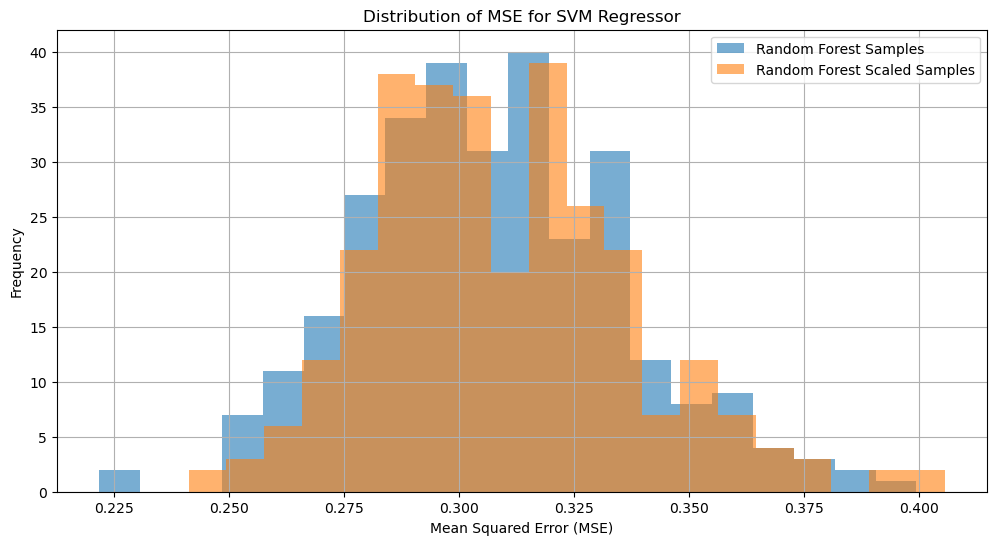

                          Model  Average MSE
0         Random Forest Samples     0.307027
1  Random Forest Scaled Samples     0.309342


In [ ]:
# Plot histograms for each model's MSE
plt.figure(figsize=(12, 6))
for model_name in models.keys():
    plt.hist(mse_values_dict[model_name], bins=20, alpha=0.6, label=model_name)

plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of MSE for SVM Regressor')
plt.legend()
plt.grid(True)

# Show the histogram plot
plt.show()

# Display the results DataFrame
print(results_df)

In [113]:
print('Done')

Done


In [ ]:
# Initialize a dictionary to store the best models and their scores
best_models = {}
best_scores = {}
best_parameters = {}

# Create a list to store the results
results = []

# Create lists to store MSE values for each model
mse_values = {model_name: [] for model_name in models}


# Iterate through the models and perform grid search
for model_name, model in models.items():
    
    average_mse = 0.0
    
    for _ in range(300):  # 300 iterations
        X_train, X_test, y_train, y_test = 
            train_test_split(
                x, y, test_size=0.2, random_state=None)
        

        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        # Get the best model and its score
        best_model = grid_search.best_estimator_
        #best_score = -grid_search.best_score_  # Negative MSE
        best_params = grid_search.best_params_

        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        # Store the MSE value
        mse_values[model_name].append(mse)
        
    # Calculate the average MSE for this model
    average_mse = np.mean(mse_values[model_name])
    
     # Append results to the list
    results.append({
        'Model': model_name,
        'Best_Parameters': best_params,
        'Best_MSE': -grid_search.best_score_,  # GridSearchCV returns negative MSE
        'Average_MSE': average_mse
    })
    
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)


 


results_df.sort_values(by='Best MSE Score', ascending=True, inplace=True)
print(results_df)

print(best_models)
print(best_scores)
print(best_parameters)


In [ ]:
results_df